In [1]:
import os
import types

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from src.visualization.toy_example import plot_moons, plot_multiclass, show_density_grid, show_acquisition_grid, plot_performance_curves
from src.data.toy_example import generate_moons, generate_multiclass
from src.methods.acquisition_functions import Random, VariationRatios, MinimumMargin, Entropy, BALD, EPIG
from src.methods.toy_example import run_active_learning_loop
from src.models.utils import GP_sample, combine_results

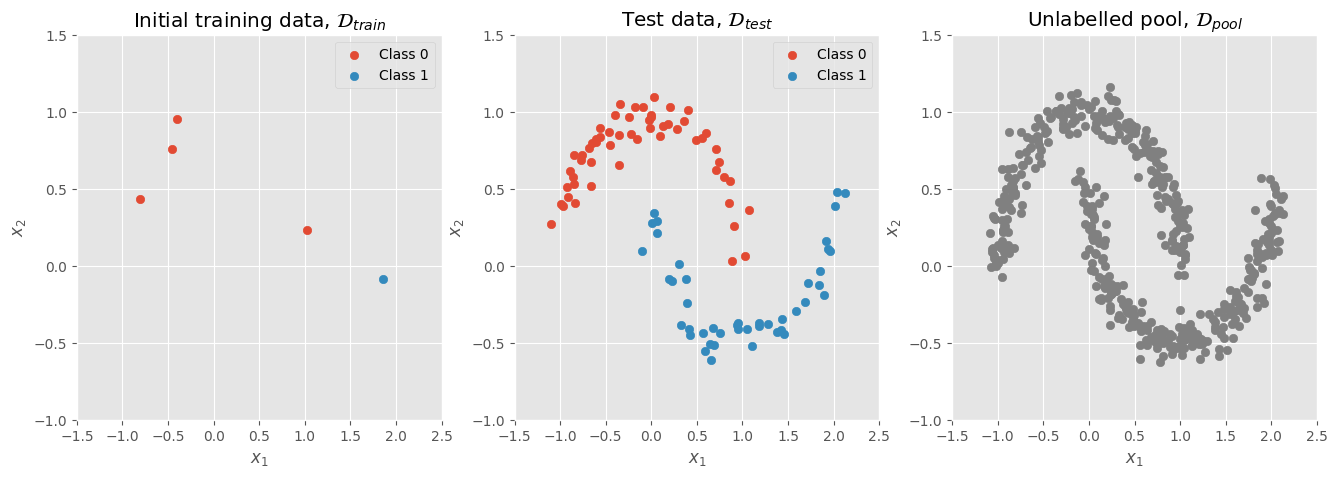

In [2]:
np.random.seed(0)

# Define dataset sizes
N_initial   = 5
N_test      = 100
N_pool      = 500
num_classes = 2

# Generate dataset partitions
Xtrain, ytrain, Xtest, ytest, Xpool, ypool = generate_moons(N_initial=N_initial, N_test=N_test, N_pool=N_pool)

# Plot the dataset partitions
plot_moons(Xtrain, ytrain, Xtest, ytest, Xpool, ypool)

In [3]:
# Define model
model           = GaussianProcessClassifier(1.0 * RBF(1.0))
model.sample    = types.MethodType( GP_sample, model )

# Train model
model.fit(Xtrain, ytrain)
# Show performance
print(f"ACCURACY\n  -> train: {model.score(Xtrain, ytrain)}\n  -> test: {model.score(Xtest, ytest)}")

ACCURACY
  -> train: 1.0
  -> test: 0.72


In [4]:
print("Test GP sampling function")
_ = model.sample(Xpool[:2], n_samples=10000, seed=0, verbose=True)

# Get samples of output_probs of pool
sample_probs = model.sample(Xpool, n_samples=5, seed=0)
print(f"\n{sample_probs.shape}")

Test GP sampling function
Sample mean:
 [[0.38266195 0.61733805]
 [0.58275691 0.41724309]]

Model mean:
 [[0.38436585 0.61563415]
 [0.57841196 0.42158804]]

(2, 5, 500)
